In [1]:
import gensim

from sklearn.manifold import TSNE


In [2]:
prefix = '../data/models/hastags'

hash_embed_10 = gensim.models.KeyedVectors.load_word2vec_format(prefix+'/hash_vectors.d10.gensim.txt', binary=False)
hash_embed = gensim.models.KeyedVectors.load_word2vec_format(prefix+'/hash_vectors.d5.gensim.txt', binary=False)

word2index = { word: idx for idx,word in enumerate(hash_embed.index2word) }

frequences = np.zeros(hash_embed.vectors.shape[0])
with open(prefix+"/hash_vocab.txt","r") as fin:
    for line in fin.read().split("\n"):
        toks = line.split(" ")
        if len(toks) != 2: continue
        frequences[ word2index[toks[0]] ] = float(toks[1])
        


In [3]:
niter = 5

def get_tsne_vecs(embed,niter=5):
    best = None
    vecs = None
    for ii in range(niter):
        tsne = TSNE()
        ii_vecs    = tsne.fit_transform(embed.vectors)
        if best is None or tsne.kl_divergence_ < best:
            vecs = ii_vecs
            best = tsne.kl_divergence_
    return best, vecs

kl, tsne_vecs = get_tsne_vecs(hash_embed)
kl_10, tsne_vecs_10 = get_tsne_vecs(hash_embed_10)


print(kl, kl_10)


0.678203284740448 0.7233235836029053


In [4]:
df = pd.DataFrame( {"x": tsne_vecs[:,0], "y": tsne_vecs[:,1], "x_10": tsne_vecs_10[:,0], "y_10": tsne_vecs_10[:,1], "word":hash_embed.index2word, "freq":frequences  })

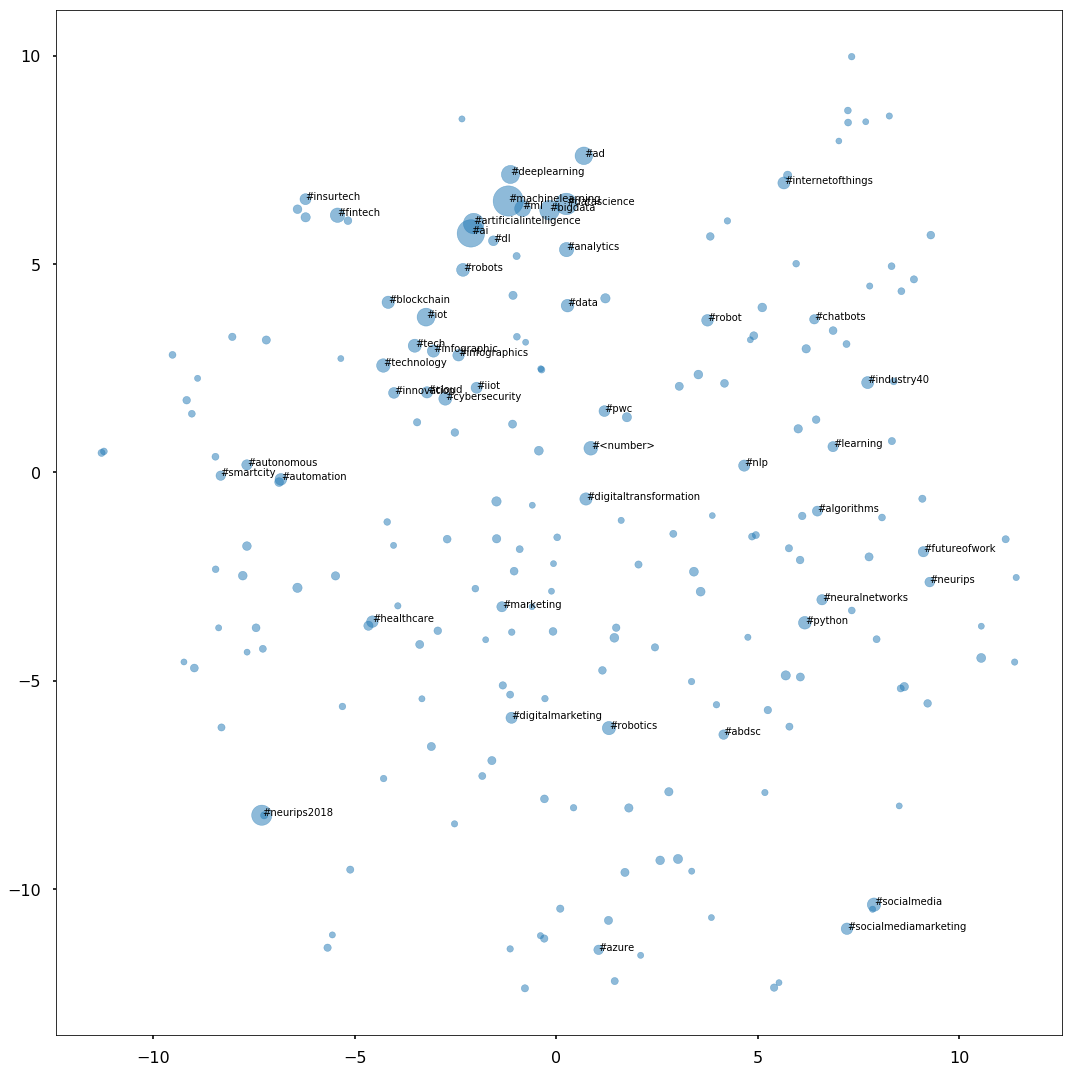

In [5]:
fig = plt.figure(figsize=(15,15))
plt.scatter(df.x,df.y,s=np.sqrt( df.freq ) *10,alpha=0.5)


for iword in range(50):
    plt.text(df.loc[iword,"x"],df.loc[iword,"y"],hash_embed.index2word[iword])

plt.tight_layout()
plt.savefig('hash_embedding.png')

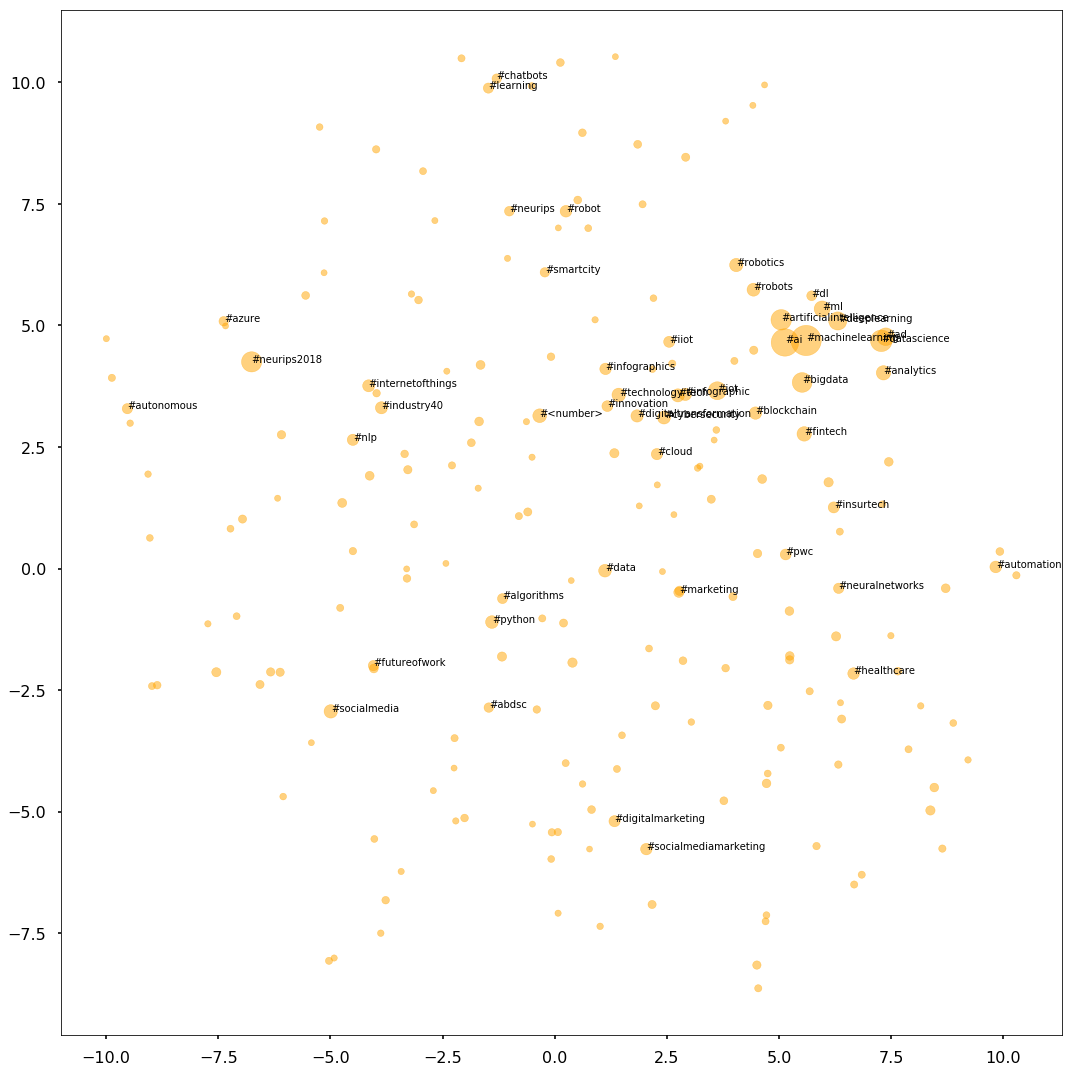

In [6]:
fig = plt.figure(figsize=(15,15))
plt.scatter(df.x_10,df.y_10,s=np.sqrt( df.freq ) *10,alpha=0.5, color="orange")


for iword in range(50):
    plt.text(df.loc[iword,"x_10"],df.loc[iword,"y_10"],hash_embed.index2word[iword])

plt.tight_layout()
plt.savefig('hash_embedding_10.png')

In [7]:
# hash_embed.index2word